In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
model = 'mobnet'


# arr_rate = 30
# pb = 20

gmd = pd.read_csv(f'{model}_bs_lr_exp_dim_infer_backtrack_multi_al.csv') 
nnRan250 = pd.read_csv(f'{model}_random_vs_nn_infer_multi_al.csv') 
bs = pd.read_csv(f'{model}_infer_only_bs_vs_optim_multi_al.csv') 
nnRan50 = pd.read_csv(f'{model}_random_vs_nn_alt_infer_multi_al.csv')              #NN50

nnRan50 = nnRan50.add_suffix('_50')

# Rename columns and add suffix to nnRan50
nnRan50.rename(columns={
    'power_budget_50': 'power_budget',
    'time_budget_50': 'time_budget',
    'arr_rate_50': 'arr_rate'
}, inplace=True)

# Convert 'power_budget' in gmd to integer type
gmd['power_budget'] = gmd['power_budget'].astype(int)

# Merge DataFrames
merged_df = pd.merge(gmd, nnRan250, on=['power_budget', 'time_budget', 'arr_rate'], how='outer', suffixes=('_gmd', '_nnRan250'))
merged_df = pd.merge(merged_df, nnRan50, on=['power_budget', 'time_budget', 'arr_rate'], how='outer')
merged_df = pd.merge(merged_df, bs, on=['power_budget', 'time_budget', 'arr_rate'], how='outer', suffixes=('_nnRan50', '_bs'))

# Display merged DataFrame
merged_df.to_csv('merged_data.csv', index=False)

In [3]:
nn50 = merged_df[['bs_nn_50', 'optim_time_nn_50', 'optim_power_nn_50', 'soln_nn_50', 'power_budget', 'arr_rate', 'time_budget']]
nn50['num_pwds'] = 50
nn50 = nn50[nn50['soln_nn_50'] == 1]
    
# nn50 = nn50[nn50['arr_rate'] == arr_rate]
# nn50 = nn50[nn50['power_budget'] == pb]
        
nn250 = merged_df[['bs_nn', 'optim_time_nn', 'optim_power_nn', 'soln_nn', 'power_budget', 'arr_rate', 'time_budget']]
nn250['num_pwds'] = 250
nn250 = nn250[nn250['soln_nn'] == 1]
# nn250 = nn250[nn250['arr_rate'] == arr_rate]
# nn250 = nn250[nn250['power_budget'] == pb]

gmd = merged_df[['bs_algo', 'algo_time', 'algo_power', 'soln_algo', 'power_budget', 'arr_rate', 'time_budget']]
gmd['num_pwds'] = merged_df['num_pwds_nnRan50']
gmd = gmd[gmd['soln_algo'] == 1]
# gmd = gmd[gmd['arr_rate'] == arr_rate]
# gmd = gmd[gmd['power_budget'] == pb]

bs = merged_df[['bs_bs', 'observed_time', 'observed_power', 'soln_bs', 'power_budget', 'arr_rate', 'time_budget']]
bs['num_pwds'] = merged_df['num_pwds_bs']
bs = bs[bs['soln_bs'] == 1]
# bs = bs[bs['arr_rate'] == arr_rate]
# bs = bs[bs['power_budget'] == pb]

rnd = merged_df[['bs_random_50', 'optim_time_random_50', 'optim_power_random_50', 'soln_random_50', 'power_budget', 'arr_rate', 'time_budget']]
rnd['num_pwds'] = 50
rnd = rnd[rnd['soln_random_50'] == 1]
# rnd = rnd[rnd['arr_rate'] == arr_rate]
# rnd = rnd[rnd['power_budget'] == pb]

optim = merged_df[['bs_optimal', 'optim_time_bs', 'optim_power_bs', 'soln_optim', 'power_budget', 'arr_rate', 'time_budget']]
optim = optim[optim['soln_optim'] == 1]
# if model == "bert":
#     optim['time_budget'] = optim['time_budget']*100
#     nn50['time_budget'] = nn50['time_budget']*100
#     rnd['time_budget'] = rnd['time_budget']*100
#     bs['time_budget'] = bs['time_budget']*100
#     gmd['time_budget'] = gmd['time_budget']*100
#     nn250['time_budget'] = nn250['time_budget']*100

# optim = optim[optim['arr_rate'] == arr_rate]
# optim = optim[optim['power_budget'] == pb]


C:\Users\laksh\AppData\Local\Temp\ipykernel_3404\901732948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn50['num_pwds'] = 50
C:\Users\laksh\AppData\Local\Temp\ipykernel_3404\901732948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn250['num_pwds'] = 250
C:\Users\laksh\AppData\Local\Temp\ipykernel_3404\901732948.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [4]:
nn50['penalty'] = 100*((nn50['optim_time_nn_50'] + nn50['bs_nn_50']/nn50['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])
nn250['penalty'] = 100*((nn250['optim_time_nn'] + nn250['bs_nn']/nn250['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])
gmd['penalty'] = 100*((gmd['algo_time'] + gmd['bs_algo']/gmd['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])
bs['penalty'] = 100*((bs['observed_time'] + bs['bs_bs']/bs['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])
rnd['penalty'] = 100*((rnd['optim_time_random_50'] + rnd['bs_random_50']/rnd['arr_rate']) - (optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate']))/(optim['optim_time_bs'] + optim['bs_optimal']/optim['arr_rate'])

In [5]:
rnd

,bs_random_50,optim_time_random_50,optim_power_random_50,soln_random_50,power_budget,arr_rate,time_budget,num_pwds,penalty
49,1.0,19.278416,17.354,1,18,30.0,0.06,50,8.119360
50,1.0,19.278416,17.354,1,19,30.0,0.06,50,8.119360
51,1.0,19.278416,17.354,1,20,30.0,0.06,50,8.121195
52,1.0,19.278416,17.354,1,21,30.0,0.06,50,8.121195
53,1.0,19.278416,17.354,1,22,30.0,0.06,50,8.121195
...,...,...,...,...,...,...,...,...,...
5858,4.0,26.228160,21.179,1,46,90.0,0.15,50,32.187787
5859,4.0,26.228160,21.179,1,47,90.0,0.15,50,32.187787
5860,4.0,26.228160,21.179,1,48,90.0,0.15,50,32.187787
5861,4.0,26.228160,21.179,1,49,90.0,0.15,50,32.187787


In [6]:
nn50['penalty_power'] = nn50['optim_power_nn_50'] - nn50['power_budget']
nn250['penalty_power'] = nn250['optim_power_nn'] - nn250['power_budget']
gmd['penalty_power'] = gmd['algo_power'] - gmd['power_budget']
bs['penalty_power'] = bs['observed_power'] - bs['power_budget']
rnd['penalty_power'] = rnd['optim_power_random_50'] - rnd['power_budget']


In [7]:
nn50 = nn50.dropna()
nn250 = nn250.dropna()

In [8]:
bs_tries = list(bs['num_pwds'])
gmd_tries = list(gmd['num_pwds'])
random_tries = list(rnd['num_pwds'])
nn_tries = list(nn50['num_pwds'])
nn250_tries = list(nn250['num_pwds'])

# # rake mean tries for all
bs_tries_mean = np.mean(bs_tries)
gmd_tries_mean = np.mean(gmd_tries)
random_tries_mean = np.mean(random_tries)
nn_tries_mean50 = np.mean(nn_tries)
nn_tries_mean250 = 100

# mean_tries_list = [random_tries_mean, nn_tries_mean50, nn_tries_mean250, bs_tries_mean, gmd_tries_mean]
mean_tries_list = [random_tries_mean, nn_tries_mean250, gmd_tries_mean]

mean_tries_list

[50.0, 100, 9.009475032010243]

In [9]:
min(gmd_tries), max(gmd_tries), np.mean(gmd_tries)

(9.0, 11.0, 9.009475032010243)

C:\Users\laksh\AppData\Local\Temp\ipykernel_3404\1414710193.py:37: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
C:\Users\laksh\AppData\Local\Temp\ipykernel_3404\1414710193.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, fontsize=22)


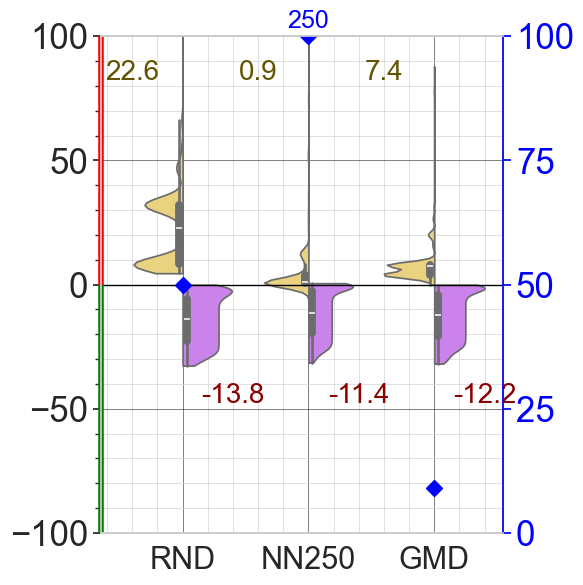

In [10]:
from matplotlib.collections import LineCollection
# Creating the data
datalist_time = [rnd['penalty'], nn250['penalty'], gmd['penalty']]
datalist_power = [rnd['penalty_power'], nn250['penalty_power'], gmd['penalty_power']]
categories = ['RND', 'NN250', 'GMD']

# Flatten the lists and create corresponding labels
data_time_flat = [item for sublist in datalist_time for item in sublist]
data_power_flat = [item for sublist in datalist_power for item in sublist]
labels_time = [categories[i] for i, sublist in enumerate(datalist_time) for item in sublist]
labels_power = [categories[i] for i, sublist in enumerate(datalist_power) for item in sublist]
type_time = ['latency'] * len(data_time_flat)
type_power = ['power'] * len(data_power_flat)

# Combine the data and labels
combined_data = data_time_flat + data_power_flat
combined_labels = labels_time + labels_power
combined_types = type_time + type_power

# Create a DataFrame
df = pd.DataFrame({
    'Penalty': combined_data,
    'Strategy': combined_labels,
    'type': combined_types
})

# Set the plot style
sns.set(style="whitegrid")

# Define custom palette colors
colors = {'latency': '#fadc6f', 'power': '#cf71fd'}

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.spines["left"].set_visible(False)
# Create the violin plot
sns.violinplot(x='Strategy', y='Penalty', hue='type', data=df, palette=colors, split=True, scale="count", cut=0, ax=ax)
ax.set_xlabel('')
if model == "resnet":
    ax.set_ylabel('Excess Over Optimal', fontsize=28)
else:
    ax.set_ylabel('', fontsize=28)

# Add dark line at y=0
ax.axhline(0, color='black', linewidth=1)

# Add median markers
medians_time = [np.median(data) for data in datalist_time]
medians_power = [np.median(data) for data in datalist_power]

for i, median in enumerate(medians_time):
    ax.text(i-0.4, 80, f"{median:.1f}", color='#635402', ha='center', va='bottom', fontsize=20)

for i, median in enumerate(medians_power):
    ax.text(i+0.4, -50, f"{median:.1f}", color='#8B0000', ha='center', va='bottom', fontsize=20)

# Add minor and major grid lines with a lower zorder value
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.7)
ax.grid(which='minor', linestyle='-', linewidth='0.5', color='lightgray')
ax.set_axisbelow(True)

upper = 101
lower = -100

colors_y_axis = ["green" if y < 0 else "red" for y in range(lower, upper)]
y_ticks = list(range(lower, upper))
x_ticks = [0] * len(y_ticks)
points = np.array([x_ticks, y_ticks]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, colors=colors_y_axis, linewidth=4, transform=ax.get_yaxis_transform(), clip_on=False)
ax.add_collection(lc)

ax.spines["left"].set_visible(False)  # Hide the left spine
ax.set_ylim(-100, 100)
# ax.set_yticks(np.arange(lower, upper, 25))
ax.tick_params(axis='y', labelsize=25)

# Set y-axis limits and ticks
ax.set_ylim(-100, 100)
ax.set_yticks([-100, -50, 0, 50, 100])
ax.tick_params(axis='y', labelsize=25)

# Add secondary y-axis (ax2)
ax2 = ax.twinx()
for i, value in enumerate(mean_tries_list):
    ax2.plot(i, value, marker='D', markersize=8, color='blue', linestyle='None')

ax2.text(categories.index('NN250'), 103, f'{250}', ha='center', va='center', fontsize=18, color='blue')

# ax2.set_ylabel('Num Tries', fontsize=20, color='blue')
ax2.set_ylim(0, 100)
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.tick_params(axis='y', labelsize=25, colors='blue')
ax2.spines['right'].set_color('blue')
if model == 'lstm':
    ax2.set_ylabel('# Profiling Runs', fontsize=28, color='blue')
ax2.grid(False)

ax.set_xticklabels(categories, fontsize=22)

if model == 'resnet':
    ax.text(-1.75, +8, '(W)', color='#b420fd', fontsize=26, rotation=90)
    ax.text(-1.75, -18, '(%)', color='#f7c81e', fontsize=26, rotation=90)
    ax.legend().remove()

elif model == 'yolo':
    ax.legend(fontsize=20, loc='lower left')

else:
    ax.legend().remove()

plt.tight_layout()
plt.savefig('Dual_Violin_infer_'+model+'.pdf', format='pdf',dpi=300, bbox_inches='tight')
plt.show()